## Logistic Regression

### Analysis on people survived on Titanic Ship Sinking

In [1]:
# importing Libraties

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style = 'white', color_codes = True,font_scale=1.5)

# for model validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# for metrics and reporting
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #all these comes under classification report

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.shape

(891, 12)

In [4]:
df_train.size

10692

In [5]:
# the target variable will be Survived. 
df_train.Survived.value_counts()  # note that there is approx 39% of passengers survived

Survived
0    549
1    342
Name: count, dtype: int64

In [6]:
df_train.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [7]:
df_train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [8]:
df_train.isnull().sum()  # note that majority of values missing from cabin column, better option would be to drop the column

#in age column, portion of missing values is around 20% hence we can fill them with appropriate values.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# there are only 891 rows in the titanic data frame. Cabin is almost all missing values, 
# so we can drop that variable completely, 

# but what about age? 
# Age seems like a relevant predictor for survival right? We'd want to keep the variables, 
# but it has 177 missing values.  

# Need to find a way to approximate for those missing values!

In [10]:
# drop all the variables that aren't relevant for predicting survival. 
# We should at least keep the following:

# Survived - This variable is obviously relevant.
# Pclass   - Does a passenger's class on the boat affect their survivability?
# Sex      - Could a passenger's gender impact their survival rate?
# Age      - Does a person's age impact their survival rate?
# SibSp    - Does the number of relatives on the boat (that are siblings or a spouse) 
#            affect a person survivability? Probability
# Parch    - Does the number of relatives on the boat (that are children or parents) 
#            affect a person survivability? Probability
# Fare     - Does the fare a person paid effect his survivability? Maybe - let's keep it.
# Embarked - Does a person's point of embarkation matter? 
#            It depends on how the boat was filled... Let's keep it.

In [11]:
# What about a person's name, ticket number, and passenger ID number? 
# They're irrelavant for predicting survivability. 
# And as you recall, the cabin variable is almost all missing values, 
# so we can just drop all of these.

In [12]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df_train = df_train.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis = 1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
# treating missing values in Age column
df_train.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [15]:
# using class to check the average age of passenger and filling with avg based on class

p_1 = df_train[df_train['Pclass'] == 1]['Age'].mean()
#filtering the Pclass, class wise and taking the mean of the age in that class
p_2 = df_train[df_train['Pclass'] == 2]['Age'].mean()
p_3 = df_train[df_train['Pclass'] == 3]['Age'].mean()
p_1, p_2, p_3   #avg age in each class . Helpful in filling the missing age class wise

(38.233440860215055, 29.87763005780347, 25.14061971830986)

In [16]:
# another way of checking
df_train.groupby(['Pclass'])[['Age', 'Fare']].mean()

,Age,Fare
Pclass,,
1,38.233441,84.154687
2,29.877630,20.662183
3,25.140620,13.675550


In [17]:
# create a function which will accept the columns Pclass and Age, and check null value and tried to fill the 
# avg age class wise

def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [18]:
# apply the function to the age column based on Pclass
df_train['Age'] = df_train[['Age', 'Pclass']].apply(age_approx, axis = 1) 

In [19]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [20]:
# drop the  rows where Embarked are missing
df_train.dropna(inplace= True)

In [21]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [22]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [23]:
# as we have categorical columns, need to convert them to numerical
#use one hot encoding/get dummies to convert. as both Sex and Embark columns are nominal

In [24]:
df_train_dummied = pd.get_dummies(df_train, columns=['Sex', 'Embarked'], drop_first= True, dtype= int)
df_train_dummied.head()

# in this the original Sex & embarked columns are dropped as well with drop_first

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [25]:
# checking the correlation (checking for independence between features)
# check if multicolinearity exists
df_train_dummied.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.335549,-0.054899,-0.034040,0.083151,0.255290,-0.541585,0.004536,-0.151777
Pclass,-0.335549,1.000000,-0.400979,0.081656,0.016824,-0.548193,0.127741,0.220558,0.076466
Age,-0.054899,-0.400979,1.000000,-0.242393,-0.173838,0.118665,0.085232,-0.070862,0.006319
SibSp,-0.034040,0.081656,-0.242393,1.000000,0.414542,0.160887,-0.116348,-0.026692,0.069438
Parch,0.083151,0.016824,-0.173838,0.414542,1.000000,0.217532,-0.247508,-0.081585,0.061512
Fare,0.255290,-0.548193,0.118665,0.160887,0.217532,1.000000,-0.179958,-0.116684,-0.163758
Sex_male,-0.541585,0.127741,0.085232,-0.116348,-0.247508,-0.179958,1.000000,-0.075217,0.121405
Embarked_Q,0.004536,0.220558,-0.070862,-0.026692,-0.081585,-0.116684,-0.075217,1.000000,-0.499261
Embarked_S,-0.151777,0.076466,0.006319,0.069438,0.061512,-0.163758,0.121405,-0.499261,1.000000


<Axes: title={'center': 'Correlation between features'}>

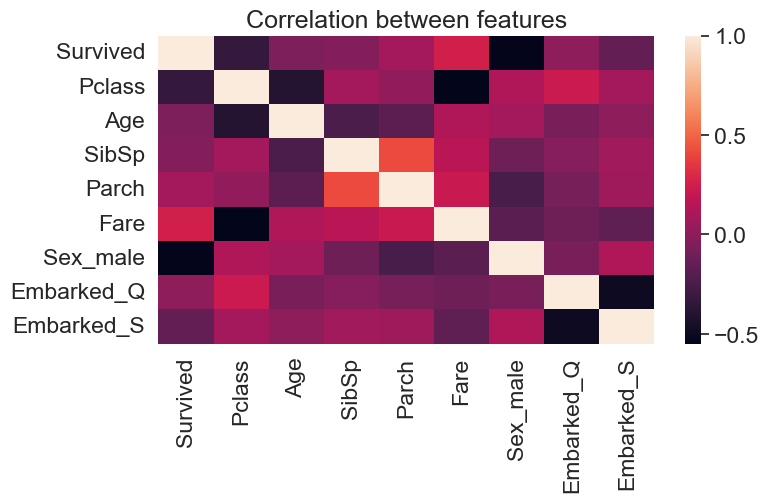

In [26]:
plt.figure(figsize = (8,4))
plt.title('Correlation between features')
sns.heatmap(df_train_dummied.corr())

In [27]:
# splitting the data into target and features
# dropping the Fare columns as it is not impacting much in the model. and to reduce redundancy
# if you want, you can keep the Fare column and perform the model
X = df_train_dummied.drop(['Survived'], axis = 1)
y = df_train_dummied['Survived']

In [28]:
X.shape

(889, 8)

In [29]:
df_train_dummied.shape

(889, 9)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.7, random_state=11)

In [31]:
import warnings
warnings.filterwarnings("ignore")

###### Random state can be selected by randomly. However if you want to check which random_state gives best accuracy, can use for loop in range(0,100) and find out which is the best suited. But this is not advisable
best_accuracy = 0.0
best_random_state = None

for random_state in range(100):  # try different random states
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    # Create and train your classifier (replace with your actual classifier)
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Update best random state if current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_random_state = random_state

print("Best Random State:", best_random_state)
print("Best Accuracy:", best_accuracy)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 8)
(267, 8)
(622,)
(267,)


In [33]:
# initiating the classifier

LogReg = LogisticRegression()

In [34]:
# training the classifier

LogReg.fit(X_train, y_train)

LogisticRegression()

In [35]:
# predicting the output using test features

y_pred = LogReg.predict(X_test)

#### Evaluation of the model

In [36]:
metrics.confusion_matrix(y_test, y_pred)

array([[142,  19],
       [ 23,  83]], dtype=int64)

<Axes: >

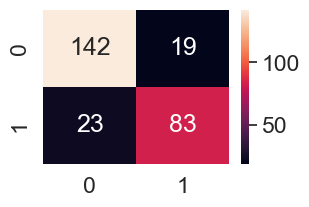

In [37]:
# using heatmap for confusion matrix
plt.figure(figsize=(3,2))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt = '0.3g')

In [38]:
metrics.accuracy_score(y_test, y_pred)

0.8426966292134831

In [39]:
len(X_test)

267

In [40]:
print(classification_report(y_test, y_pred))  # this report gives, various metrics as below

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       161
           1       0.81      0.78      0.80       106

    accuracy                           0.84       267
   macro avg       0.84      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267



In [41]:
metrics.recall_score(y_test, y_pred)

0.7830188679245284

In [42]:
metrics.precision_score(y_test,y_pred)

0.8137254901960784

In [43]:
metrics.precision_recall_curve(y_test, y_pred)  # 1st array is precision, 2- recall 3 -thresholds

(array([0.39700375, 0.81372549, 1.        ]),
 array([1.        , 0.78301887, 0.        ]),
 array([0, 1], dtype=int64))

In [44]:
print("Coefficient:",LogReg.coef_)
print("intercept:",LogReg.intercept_)

Coefficient: [[-1.02258497 -0.03581339 -0.28252377 -0.16564894  0.00496645 -2.30751656
   0.17374416 -0.30836795]]
intercept: [4.54982645]


In [45]:
df_train_dummied.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [46]:
prob_values = LogReg.predict_proba(X_test)

In [47]:
len(prob_values)

267

In [48]:
prob_values

array([[0.36848301, 0.63151699],
       [0.92864223, 0.07135777],
       [0.34256076, 0.65743924],
       [0.47426036, 0.52573964],
       [0.81111476, 0.18888524],
       [0.83329241, 0.16670759],
       [0.56490566, 0.43509434],
       [0.07156822, 0.92843178],
       [0.06670059, 0.93329941],
       [0.81884556, 0.18115444],
       [0.57709806, 0.42290194],
       [0.85499004, 0.14500996],
       [0.8187872 , 0.1812128 ],
       [0.07429771, 0.92570229],
       [0.27274233, 0.72725767],
       [0.86575832, 0.13424168],
       [0.85227784, 0.14772216],
       [0.63456325, 0.36543675],
       [0.0629947 , 0.9370053 ],
       [0.90382638, 0.09617362],
       [0.46761496, 0.53238504],
       [0.60649614, 0.39350386],
       [0.86342234, 0.13657766],
       [0.8288411 , 0.1711589 ],
       [0.87622246, 0.12377754],
       [0.88629987, 0.11370013],
       [0.87965506, 0.12034494],
       [0.49455966, 0.50544034],
       [0.70482311, 0.29517689],
       [0.92934019, 0.07065981],
       [0.

In [49]:
metrics.roc_auc_score(y_test, y_pred)   # this is area under the roc curve

0.83250322278214

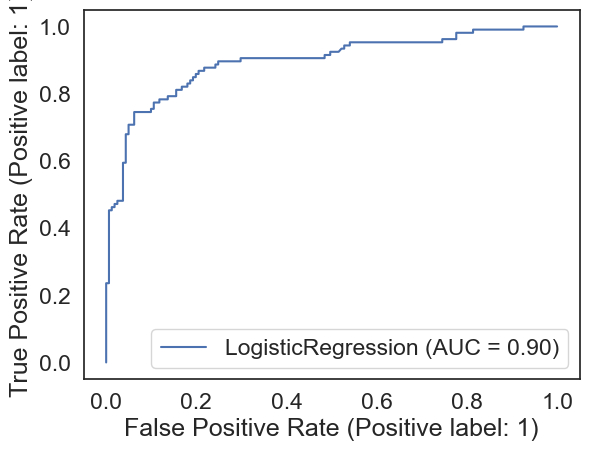

In [50]:
# plotting the ROC Curve from Estimators, X_test, y_test
# this ROC curve is nothing but Sigmoid curve for logistic regression

metrics.RocCurveDisplay.from_estimator(LogReg, X_test,y_test)

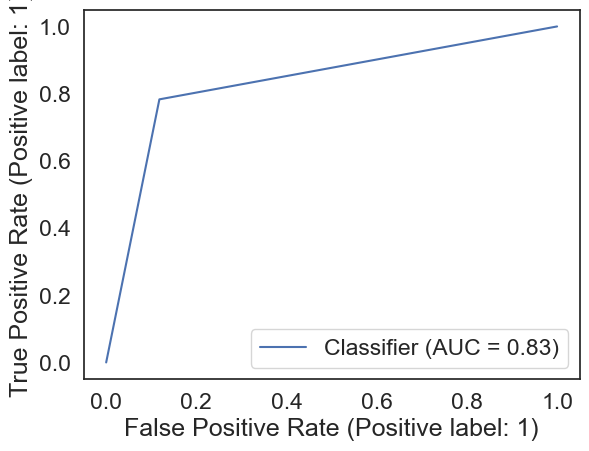

In [51]:
# ROC curve from Predictions y_test, y_pred

metrics.RocCurveDisplay.from_predictions(y_test,y_pred)

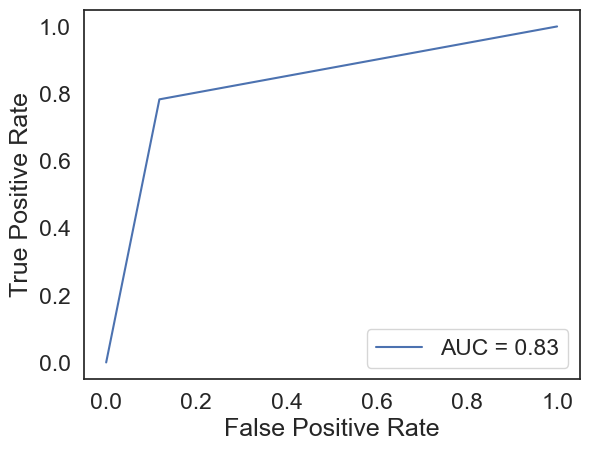

In [52]:
# this is method to display the curve using 
# fpr = False Positive Rate
# tpr = True Positive Rate
# roc_auc = Area under curve
# ROC - Receiver Operating Characteristic
# thresholds  - 1.,  0.


fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

In [53]:
print("False Positive Rate:", fpr) #(1-Specificity) Specificity --> True negative rate
print("True Positive Rate:", tpr) # Recall Rate
print("Area under curve:", roc_auc)
print("Threshold:", thresholds)

False Positive Rate: [0.         0.11801242 1.        ]
True Positive Rate: [0.         0.78301887 1.        ]
Area under curve: 0.83250322278214
Threshold: [inf  1.  0.]
